In [58]:
%run extract_data.py
# zillow_data
# airqual_data
# persinc_data
# inclvl_data
# census_data

Your data is ready! Merged table name is zillow_full.


In [59]:
zillow_full.isnull().sum().head(50)

Zipcode                    0
City                       0
State                      0
Metro                      0
County                     0
SizeRank                   0
Date                       0
Rent                       0
Year                       0
State-County               0
AQIMean                  221
PersonalIncome           291
Vol_moderate_income     5238
Vol_low_income          5238
total_pop                  0
households                 0
median_age                 0
median_income              0
income_per_capita          0
gini_index                 0
pct_poverty                0
housing_availability       0
home_density               0
pct_employed               0
pct_jobs_nightlife         0
pct_unemployed             0
move_within_city           0
move_new_city              0
avg_commute_time           0
pct_college                0
dtype: int64

In [60]:
zillow_full = zillow_full.drop(['PersonalIncome', 'AQIMean', 'Vol_moderate_income', 'Vol_low_income'], axis=1)

In [61]:
# SF Metro
counties = ['Alameda County', 'Contra Costa County', 'Marin County', 'Napa County', 'San Mateo County', 
            'Santa Clara County', 'Solano County', 'Sonoma County', 'San Francisco County']
# NY Metro:
# counties = ['New York County', 'Bronx County', 'Queens County', 'Kings County', 'Richmond County']
# Greater Austin Metro:
# counties = ['Bastrop County', 'Caldwell County', 'Hays County', 'Travis County', 'Williamson County']
# Miami Metro:
# counties = ['Miami-Dade County', 'Broward County', 'Palm Beach County']

# metro = ['San Francisco, CA', 'San Jose, CA']

In [62]:
zillow_sf = zillow_full[zillow_full['County'].isin(counties)]
zillow_sf

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
6,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,2015-01-01,3243.0,2015,CA-San Francisco County,...,0.119091,1.130693,1.711882,0.960364,0.133581,0.039383,0.096988,0.092718,27.902058,0.355347
15,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,37,2015-01-01,1543.0,2015,CA-Contra Costa County,...,0.142441,1.050882,3.437972,0.906157,0.092268,0.092774,0.026613,0.095034,39.228910,0.084668
31,94501,Alameda,CA,San Francisco-Oakland-Hayward,Alameda County,79,2015-01-01,2091.0,2015,CA-Alameda County,...,0.094863,1.060836,2.518760,0.937902,0.086063,0.042095,0.031421,0.088310,30.850405,0.232555
34,94110,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,84,2015-01-01,3899.0,2015,CA-San Francisco County,...,0.095319,1.081591,2.673817,0.959292,0.129310,0.040287,0.070684,0.055285,28.958233,0.270061
57,95123,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,186,2015-01-01,2447.0,2015,CA-Santa Clara County,...,0.053959,1.041201,2.966924,0.955711,0.078397,0.044153,0.083366,0.050948,30.534267,0.195978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,94621,Oakland,CA,San Francisco-Oakland-Hayward,Alameda County,1528,2020-01-01,2621.0,2020,CA-Alameda County,...,0.286818,1.095813,3.674964,0.914717,0.133202,0.085283,0.066143,0.042424,29.867017,0.031456
17713,94085,Sunnyvale,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1565,2020-01-01,3087.0,2020,CA-Santa Clara County,...,0.078133,1.054061,2.824064,0.960805,0.100882,0.039195,0.050186,0.118711,22.725331,0.185287
17714,94703,Berkeley,CA,San Francisco-Oakland-Hayward,Alameda County,1571,2020-01-01,2814.0,2020,CA-Alameda County,...,0.148539,1.076985,2.513117,0.947768,0.094020,0.052232,0.052560,0.105529,26.719606,0.246980
17722,94105,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,1641,2020-01-01,4097.0,2020,CA-San Francisco County,...,0.070235,1.304605,1.865322,0.946338,0.060536,0.053662,0.093938,0.165811,24.104981,0.313271


In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
# from PlottingFunctions import plot_inertia, plot_silhouette

kmeans = KMeans()

In [65]:
num_cols = zillow_sf.select_dtypes(exclude = ["object"])
num_cols = num_cols.drop(['Date', 'SizeRank'], axis=1)
num_cols

,Rent,Year,total_pop,households,median_age,median_income,income_per_capita,gini_index,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
6,3243.0,2015,56677.0,33108.0,36.9,88593.0,80359.0,0.5337,0.119091,1.130693,1.711882,0.960364,0.133581,0.039383,0.096988,0.092718,27.902058,0.355347
15,1543.0,2015,96081.0,27947.0,34.0,67772.0,26187.0,0.4321,0.142441,1.050882,3.437972,0.906157,0.092268,0.092774,0.026613,0.095034,39.228910,0.084668
31,2091.0,2015,63843.0,25347.0,40.5,89769.0,46554.0,0.4417,0.094863,1.060836,2.518760,0.937902,0.086063,0.042095,0.031421,0.088310,30.850405,0.232555
34,3899.0,2015,74161.0,27736.0,37.1,123576.0,65610.0,0.4810,0.095319,1.081591,2.673817,0.959292,0.129310,0.040287,0.070684,0.055285,28.958233,0.270061
57,2447.0,2015,67186.0,22645.0,38.4,112946.0,44898.0,0.3844,0.053959,1.041201,2.966924,0.955711,0.078397,0.044153,0.083366,0.050948,30.534267,0.195978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,2621.0,2020,35287.0,9602.0,29.4,38591.0,15973.0,0.4770,0.286818,1.095813,3.674964,0.914717,0.133202,0.085283,0.066143,0.042424,29.867017,0.031456
17713,3087.0,2020,23612.0,8361.0,31.6,116332.0,54547.0,0.4292,0.078133,1.054061,2.824064,0.960805,0.100882,0.039195,0.050186,0.118711,22.725331,0.185287
17714,2814.0,2020,21937.0,8729.0,34.4,77259.0,45542.0,0.4690,0.148539,1.076985,2.513117,0.947768,0.094020,0.052232,0.052560,0.105529,26.719606,0.246980
17722,4097.0,2020,9155.0,4908.0,35.2,213009.0,138902.0,0.4322,0.070235,1.304605,1.865322,0.946338,0.060536,0.053662,0.093938,0.165811,24.104981,0.313271


In [32]:
# zillow_sf = zillow_sf.drop('Date', axis=1)

In [33]:
zillow_sf

,Zipcode,City,State,Metro,County,SizeRank,Rent,Year,State-County,total_pop,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Zipcode_int
6,94109,20,0,0,3,14,3243.0,2015,3,56677.0,...,1.130693,1.711882,0.960364,0.133581,0.039383,0.096988,0.092718,27.902058,0.355347,94109
15,94565,16,0,0,1,37,1543.0,2015,1,96081.0,...,1.050882,3.437972,0.906157,0.092268,0.092774,0.026613,0.095034,39.228910,0.084668,94565
31,94501,0,0,0,0,79,2091.0,2015,0,63843.0,...,1.060836,2.518760,0.937902,0.086063,0.042095,0.031421,0.088310,30.850405,0.232555,94501
34,94110,20,0,0,3,84,3899.0,2015,3,74161.0,...,1.081591,2.673817,0.959292,0.129310,0.040287,0.070684,0.055285,28.958233,0.270061,94110
57,95123,21,0,1,5,186,2447.0,2015,5,67186.0,...,1.041201,2.966924,0.955711,0.078397,0.044153,0.083366,0.050948,30.534267,0.195978,95123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17707,94621,15,0,0,0,1528,2621.0,2020,0,35287.0,...,1.095813,3.674964,0.914717,0.133202,0.085283,0.066143,0.042424,29.867017,0.031456,94621
17713,94085,28,0,1,5,1565,3087.0,2020,5,23612.0,...,1.054061,2.824064,0.960805,0.100882,0.039195,0.050186,0.118711,22.725331,0.185287,94085
17714,94703,2,0,0,0,1571,2814.0,2020,0,21937.0,...,1.076985,2.513117,0.947768,0.094020,0.052232,0.052560,0.105529,26.719606,0.246980,94703
17722,94105,20,0,0,3,1641,4097.0,2020,3,9155.0,...,1.304605,1.865322,0.946338,0.060536,0.053662,0.093938,0.165811,24.104981,0.313271,94105


In [74]:
kmeans.set_params(n_clusters=3)

KMeans(n_clusters=3)

In [75]:
kmeans.fit(num_cols)

KMeans(n_clusters=3)

In [76]:
clusters = pd.DataFrame({'Clusters':kmeans.labels_})
clusters

,Clusters
0,2
1,0
2,2
3,2
4,2
...,...
3472,0
3473,2
3474,2
3475,1


In [77]:
zillow_sf1 = zillow_full[zillow_full['County'].isin(counties)].reset_index().drop('index', axis=1)
zillow_sf1

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,pct_poverty,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college
0,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,2015-01-01,3243.0,2015,CA-San Francisco County,...,0.119091,1.130693,1.711882,0.960364,0.133581,0.039383,0.096988,0.092718,27.902058,0.355347
1,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,37,2015-01-01,1543.0,2015,CA-Contra Costa County,...,0.142441,1.050882,3.437972,0.906157,0.092268,0.092774,0.026613,0.095034,39.228910,0.084668
2,94501,Alameda,CA,San Francisco-Oakland-Hayward,Alameda County,79,2015-01-01,2091.0,2015,CA-Alameda County,...,0.094863,1.060836,2.518760,0.937902,0.086063,0.042095,0.031421,0.088310,30.850405,0.232555
3,94110,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,84,2015-01-01,3899.0,2015,CA-San Francisco County,...,0.095319,1.081591,2.673817,0.959292,0.129310,0.040287,0.070684,0.055285,28.958233,0.270061
4,95123,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,186,2015-01-01,2447.0,2015,CA-Santa Clara County,...,0.053959,1.041201,2.966924,0.955711,0.078397,0.044153,0.083366,0.050948,30.534267,0.195978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,94621,Oakland,CA,San Francisco-Oakland-Hayward,Alameda County,1528,2020-01-01,2621.0,2020,CA-Alameda County,...,0.286818,1.095813,3.674964,0.914717,0.133202,0.085283,0.066143,0.042424,29.867017,0.031456
3473,94085,Sunnyvale,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1565,2020-01-01,3087.0,2020,CA-Santa Clara County,...,0.078133,1.054061,2.824064,0.960805,0.100882,0.039195,0.050186,0.118711,22.725331,0.185287
3474,94703,Berkeley,CA,San Francisco-Oakland-Hayward,Alameda County,1571,2020-01-01,2814.0,2020,CA-Alameda County,...,0.148539,1.076985,2.513117,0.947768,0.094020,0.052232,0.052560,0.105529,26.719606,0.246980
3475,94105,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,1641,2020-01-01,4097.0,2020,CA-San Francisco County,...,0.070235,1.304605,1.865322,0.946338,0.060536,0.053662,0.093938,0.165811,24.104981,0.313271


In [78]:
zillow_sf1 = pd.concat([zillow_sf1, clusters['Clusters']], axis=1)
zillow_sf1

,Zipcode,City,State,Metro,County,SizeRank,Date,Rent,Year,State-County,...,housing_availability,home_density,pct_employed,pct_jobs_nightlife,pct_unemployed,move_within_city,move_new_city,avg_commute_time,pct_college,Clusters
0,94109,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,14,2015-01-01,3243.0,2015,CA-San Francisco County,...,1.130693,1.711882,0.960364,0.133581,0.039383,0.096988,0.092718,27.902058,0.355347,2
1,94565,Pittsburg,CA,San Francisco-Oakland-Hayward,Contra Costa County,37,2015-01-01,1543.0,2015,CA-Contra Costa County,...,1.050882,3.437972,0.906157,0.092268,0.092774,0.026613,0.095034,39.228910,0.084668,0
2,94501,Alameda,CA,San Francisco-Oakland-Hayward,Alameda County,79,2015-01-01,2091.0,2015,CA-Alameda County,...,1.060836,2.518760,0.937902,0.086063,0.042095,0.031421,0.088310,30.850405,0.232555,2
3,94110,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,84,2015-01-01,3899.0,2015,CA-San Francisco County,...,1.081591,2.673817,0.959292,0.129310,0.040287,0.070684,0.055285,28.958233,0.270061,2
4,95123,San Jose,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,186,2015-01-01,2447.0,2015,CA-Santa Clara County,...,1.041201,2.966924,0.955711,0.078397,0.044153,0.083366,0.050948,30.534267,0.195978,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3472,94621,Oakland,CA,San Francisco-Oakland-Hayward,Alameda County,1528,2020-01-01,2621.0,2020,CA-Alameda County,...,1.095813,3.674964,0.914717,0.133202,0.085283,0.066143,0.042424,29.867017,0.031456,0
3473,94085,Sunnyvale,CA,San Jose-Sunnyvale-Santa Clara,Santa Clara County,1565,2020-01-01,3087.0,2020,CA-Santa Clara County,...,1.054061,2.824064,0.960805,0.100882,0.039195,0.050186,0.118711,22.725331,0.185287,2
3474,94703,Berkeley,CA,San Francisco-Oakland-Hayward,Alameda County,1571,2020-01-01,2814.0,2020,CA-Alameda County,...,1.076985,2.513117,0.947768,0.094020,0.052232,0.052560,0.105529,26.719606,0.246980,2
3475,94105,San Francisco,CA,San Francisco-Oakland-Hayward,San Francisco County,1641,2020-01-01,4097.0,2020,CA-San Francisco County,...,1.304605,1.865322,0.946338,0.060536,0.053662,0.093938,0.165811,24.104981,0.313271,1


In [79]:
zillow_sf1[['Zipcode', 'Clusters', 'Year']].to_csv('sf_clusters.csv', index=False)

C:\Users\eugen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


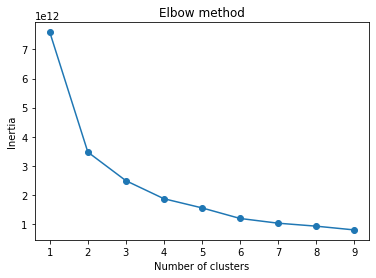

In [73]:
from PlottingFunctions import plot_inertia, plot_silhouette
plot_inertia(kmeans, num_cols, range(1, 10))

In [56]:
kmeans.set_params(n_clusters=3)
kmeans.fit(zillow_sf)

KMeans(n_clusters=3)

In [57]:
clusters = pd.DataFrame({'Clusters':kmeans.labels_})
zillow_sf1 = pd.concat([zillow_sf1, clusters['Clusters']], axis=1)
zillow_sf1[['Zipcode', 'Clusters', 'Year']].to_csv('sf_clusters.csv', index=False)